In [24]:
import glob
import importlib
import time
from os.path import expanduser
import copy
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import mpl_toolkits.axes_grid1 as axg1

import deepposekit as dpk
import TrainingGeneratorTFRecord as TGTFR
import apt_dpk 
import apt_dpk_exps as ade
import run_apt_expts_2 as rae
import APT_interface as apt
import PoseTools as pt
import multiResData as mrd
import open_pose_data as opd
import util
import tfdatagen

from deepposekit.models import StackedDenseNet

In [ ]:
#dg = dpk.DataGenerator(DPK_DSET)

In [2]:
sdn,conf_saved, conf = ade.exp1orig_assess('dpkorig_20200512T180752_run4_tfr_ptia_01',returnsdn=True,net='dpkfly')

/dat0/venv/env/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
I0612 13:22:02.754502 139869547046720 apt_dpk.py:473] DPK size stuff: imsz=(192, 192), imsz_pad=(192, 192), imsz_net=(192, 192), rescale=1.0, n_trans_min=5
W0612 13:22:02.765516 139869547046720 deprecation.py:506] From /dat0/venv/env/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0612 13:22:02.766545 139869547046720 deprecation.py:506] From /dat0/venv/env/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated

conf vs conf_saved:
using vars(d1)
using vars(d2)
0 keys in d1 not in d2: set()
1 keys in d2 not in d1: {'ignore_occluded'}
labelfile: values differ, /dat0/jrcmirror/groups/branson/bransonlab/apt/experiments/data/leap_dataset_gt_stripped_numchans1.lbl vs /groups/branson/bransonlab/apt/experiments/data/leap_dataset_gt_stripped_numchans1.lbl
horz_flip: values differ, False vs True
save_step: values differ, 1000 vs 4956
dpk_augmenter_type: values differ, {'type': 'dpkfly'} vs None
display_step: values differ, 50 vs 84
batch_size: values differ, 8 vs 16
flipLandmarkMatches: values differ, {} vs {'1': 2, '10': 22, '7': 19, '6': 18, '19': 7, '13': 25, '16': 28, '26': 14, '21': 9, '15': 27, '22': 10, '25': 13, '2': 1, '18': 6, '28': 16, '14': 26, '30': 31, '29': 17, '31': 30, '20': 8, '8': 20, '24': 12, '11': 23, '23': 11, '9': 21, '12': 24, '27': 15, '17': 29}
dpk_use_tfdata: values differ, False vs True
maxckpt: values differ, 5 vs 200
dpk_base_lr_used: values differ, None vs 0.001
crange: 

In [ ]:
apt_dpk.print_dpk_conf(conf_saved['conf'])

In [ ]:
conf_saved

In [3]:
mp=sdn.predict_model

In [6]:
vars(conf)

{'rescale': 1.0,
 'label_blur_rad': 3.0,
 'batch_size': 8,
 'view': 0,
 'gamma': 0.1,
 'display_step': 50,
 'num_test': 24,
 'dl_steps': 60000,
 'decay_steps': 25000,
 'learning_rate': 0.0001,
 'trx_align_theta': False,
 'horz_flip': False,
 'vert_flip': False,
 'brange': [-0.1, 0.1],
 'crange': [0.9, 1.1],
 'rrange': 15.0,
 'trange': 10.0,
 'scale_range': 0.2,
 'scale_factor_range': 1.1,
 'use_scale_factor_range': False,
 'imax': 255.0,
 'check_bounds_distort': True,
 'adjust_contrast': False,
 'clahe_grid_size': 20,
 'normalize_img_mean': False,
 'normalize_batch_mean': False,
 'perturb_color': False,
 'flipLandmarkMatches': {},
 'learning_rate_multiplier': 1.0,
 'splitType': 'frame',
 'trainfilename': 'train_TF',
 'fulltrainfilename': 'fullTrain_TF',
 'valfilename': 'val_TF',
 'valdatafilename': 'valdata',
 'valratio': 0.3,
 'holdoutratio': 0.8,
 'max_n_animals': 1,
 'flipud': False,
 'unet_rescale': 1.0,
 'unet_keep_prob': 1.0,
 'unet_use_leaky': False,
 'use_pretrained_weights': T

In [7]:
conf.dpk_use_tfdata = True

In [8]:
tgtfr = TGTFR.TrainingGeneratorTFRecord(conf)

I0612 13:23:57.808280 139869547046720 TrainingGeneratorTFRecord.py:98] TGTFR. Using trn=/dat0/apt/cache/leap_dset/dpkfly/view_0/dpkorig_20200512T180752_run4_tfr_ptia_01/train_TF.tfrecords, ntrn=1350
I0612 13:23:57.809376 139869547046720 TrainingGeneratorTFRecord.py:99] TGTFR. Using val=/dat0/apt/cache/leap_dset/dpkfly/view_0/dpkorig_20200512T180752_run4_tfr_ptia_01/val_TF.tfrecords, nval=150
I0612 13:23:57.810780 139869547046720 TrainingGeneratorTFRecord.py:122] TGTFR. created dpk_augmenter, type dpkfly, swapidx [-1  2  1 -1 -1 -1 18 19 20 21 22 23 24 25 26 27 28 29  6  7  8  9 10 11
 12 13 14 15 16 17 31 30].
I0612 13:23:58.934581 139869547046720 TrainingGeneratorTFRecord.py:135] TGTFR. n_output_chans=66
I0612 13:23:58.935503 139869547046720 TrainingGeneratorTFRecord.py:139] TGTFR. use_tfdata: True


In [13]:
dsval_kps = tgtfr(n_outputs=1,batch_size=10,validation=True,confidence=False,infinite=False)
dsval_imsonly = dsval_kps.map(map_func=lambda ims, locs: ims)
dsval_locsonly = dsval_kps.map(map_func=lambda ims, locs: locs)

W0612 13:28:22.426988 139869547046720 TrainingGeneratorTFRecord.py:251] batch specification (10) differs from conf.batch_size (8)!
I0612 13:28:22.430301 139869547046720 tfdatagen.py:739] Val DB exists: Data for validation from:/dat0/apt/cache/leap_dset/dpkfly/view_0/dpkorig_20200512T180752_run4_tfr_ptia_01/val_TF.tfrecords


In [65]:
preds = mp.predict(dsval_imsonly,verbose=1)

     15/Unknown - 24s 2s/step

In [15]:
locs = tfdatagen.read_ds_idxed(dsval_locsonly,range(15))
locs = np.concatenate(locs,axis=0)
locs.shape

Got 0
Got 1
Got 2
Got 3
Got 4
Got 5
Got 6
Got 7
Got 8
Got 9
Got 10
Got 11
Got 12
Got 13
Got 14


(150, 32, 2)

In [16]:
d2 = (preds[:,:,:2]-locs)**2
d = np.sqrt(np.sum(d2,axis=-1))

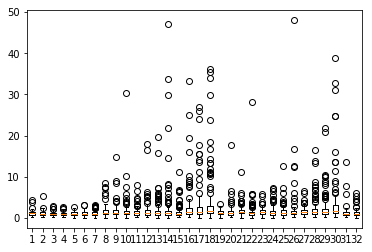

In [18]:
plt.boxplot(d)
plt.show()

In [19]:
d.shape

(150, 32)

In [67]:
np.mean(d,axis=0).shape

(32,)

In [71]:
ptls=np.percentile(d,[10,50,90],axis=0)

In [72]:
ptls[1,:]

array([1.09433353, 0.97692612, 0.95995808, 0.97199559, 1.04498798,
       1.03536969, 1.01823545, 1.29119921, 1.32513195, 1.26680201,
       1.10722429, 1.27529544, 1.18422544, 1.24770963, 0.9935312 ,
       1.56025594, 1.53483635, 1.67857027, 1.25090796, 1.30075651,
       1.47502786, 1.13241881, 1.37200391, 1.20473713, 1.24931157,
       1.27593029, 1.40985799, 1.40506643, 1.47565973, 1.78504837,
       1.02097905, 1.05895722])

In [78]:
import csv   
#with open(r'name', 'a') as f:
#    writer = csv.writer(f)
#    writer.writerow(fields)

In [79]:
csv

<module 'csv' from '/usr/lib/python3.6/csv.py'>

In [74]:
row = ptls[1,:]

In [81]:
len(row)

32

In [86]:
nkpt =32

In [87]:
n = 4*nkpt

In [94]:
x = np.random.rand(n)*10

In [95]:
x

array([2.39144687, 9.71307669, 4.92661679, 1.91131038, 2.81667501,
       1.5371194 , 9.96513623, 1.97612334, 6.36139628, 7.81447   ,
       0.13576328, 2.75538912, 7.13630296, 4.26539085, 3.63406375,
       1.15557535, 6.55627513, 3.78954614, 3.26625687, 6.04316994,
       9.20408037, 2.40341217, 1.91581844, 4.21536697, 2.13428155,
       8.76430789, 9.93366817, 3.29167307, 2.70337759, 7.200511  ,
       9.50740517, 2.80368758, 5.60511679, 4.70465418, 7.81138666,
       4.02553116, 8.05941923, 3.00005339, 6.94879206, 7.69187583,
       9.45815916, 9.53049   , 7.23604401, 8.86617684, 0.67280617,
       8.14582778, 6.23111516, 6.48956306, 9.82526356, 3.42238113,
       5.32525513, 0.65495008, 0.82292676, 4.23019689, 8.26706146,
       0.08861656, 1.31164956, 6.62926615, 0.26024445, 9.34040133,
       7.26275646, 2.7565622 , 5.1709917 , 0.52428561, 7.61979683,
       5.80086109, 8.03865299, 8.91383598, 6.36453942, 9.16283565,
       0.91437187, 0.69030478, 2.63748918, 9.32642596, 5.48951

In [82]:
hdr=[str(x) for x in range(len(row))]

In [98]:
csvf = '/dat0/apt/dpkwking/test.csv'
with open(csvf,'a') as f:
    writer = csv.writer(f)
    for i in range(1000):
        writer.writerow(x)


In [85]:
row2 = list(range(len(row)+1))
with open(csvf,'a') as f:
    writer = csv.writer(f)
    writer.writerow(row2)

In [25]:
eresf = os.path.join(conf.cachedir,'eresf.pickle')
eres = pt.pickle_load(eresf)

In [31]:
eres['eres1']['euclidean'].shape


(150, 32)

In [102]:
y = np.zeros((3))

In [104]:
[1] + list(y)

[1, 0.0, 0.0, 0.0]

In [43]:
dd=eres['eres1']['euclidean']-d
ddrel = dd/np.abs(d)

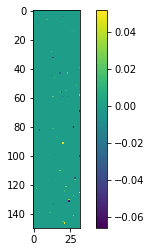

In [44]:
plt.imshow(ddrel)
plt.colorbar()


In [62]:
tf=np.abs(ddrel)>.01

In [63]:
dd[tf]

array([-0.03563079,  0.02997655, -0.01826507,  0.01727939,  0.03790036,
       -0.03699906,  0.03826426, -0.03992983,  0.03564859,  0.00702779,
        0.0399883 ,  0.02903827, -0.03957662,  0.02880854,  0.02272531,
       -0.02504993, -0.03170481, -0.03654294, -0.01108717, -0.03688344,
        0.01671447, -0.03867399,  0.03100488, -0.01680346, -0.03713814,
        0.03998502, -0.02359383,  0.01589833,  0.03969949,  0.01927187,
        0.01386135,  0.0386146 ,  0.02198133,  0.03876443, -0.03180965,
        0.03852359,  0.01023015,  0.02462162,  0.03828173,  0.034199  ])

In [64]:
np.count_nonzero(tf)

40

## Create a TGTFR/TFDS with PT aug, SDN

In [ ]:
# Create a TGTFR with our default imgaug
conf_exp2 = apt.create_conf(LEAPSTRIPPEDLBL, 0, EXPNAME, \
                            CACHE, 'dpkfly', quiet=False)
conf_exp2.img_dim = 1
conf_exp2 = apt_dpk.update_conf_dpk(conf_exp2,
                                    dg.graph,
                                    dg.swap_index,
                                    n_keypoints=dg.n_keypoints,
                                    imshape=dg.compute_image_shape(),
                                    useimgaug=False,
                                    imgaugtype='dpkfly')
conf_exp2.dpk_use_tfdata = True
conf_exp2.dpk_use_augmenter = False
ade.exp2_set_posetools_aug_config_leapfly(conf_exp2)
conf_exp2.print_dataaug_flds()

In [ ]:
'''
tgtfr = TGTFR.TrainingGeneratorTFRecord(conf_exp2)
sdn = StackedDenseNet(tgtfr,
                      n_stacks=conf_exp2.dpk_n_stacks,
                      growth_rate=conf_exp2.dpk_growth_rate,
                      pretrained=conf_exp2.dpk_use_pretrained)
'''
tgtfr, sdn = apt_dpk.compile(conf_exp2)

In [ ]:
train_model = sdn.train_model

dstrn = sdn.train_generator(sdn.n_outputs,
                            batch_size=16,
                            validation=False,
                            confidence=True,
                            shuffle=True,
                            infinite=True)    
train_model.fit(dstrn,
                epochs=2,
                steps_per_epoch=3,
                verbose=2,
                )

In [ ]:
'''
test or evaluate require a compile and setting up a loss fn and metric. 
the custom metric i guess i figured out. custom loss i am not sure presumably doable 
but anyway evalute() is more opaque. the issue with the custom whatever is the 3rd col 
of 'confidences' in the subpx predict output.

just running predict() straightup only requires splitting the dsval into ims and locs.

'''

In [ ]:
tfdatagen.montage(ims, locs=locs)

In [ ]:
def my_metric_fn(y_true, y_pred):
    d2 = tf.square(y_true - y_pred[:,:,:2])
    d2 = tf.reduce_sum(d2, axis=-1)  # [B x nkpt]
    d = tf.sqrt(d2)
    dmi = tf.reduce_mean(d, axis=-1) # [B], mean euc err across kpts
    return dmi

In [ ]:
#mp.compile('adam','mse')
mp.compile(optimizer='adam', loss='mse', metrics=[my_metric_fn])


In [ ]:
#tgtfr.conf.dpk_augmenter.reseed(RNGSEED)
ds = tgtfr(n_outputs=1, batch_size=4, 
           validation=False, confidence=True, shuffle=False)

resDS = tfdatagen.read_ds_idxed(ds,range(6))
for i in range(6):
    resDS[i] = (resDS[i][0], resDS[i][1][0])  # tfds puts tgts in list even for n_outputs=1
imsDS, tgtsDS = tfdatagen.xylist2xyarr(resDS)
imsDS.shape, tgtsDS.shape

In [ ]:
imsDS = np.moveaxis(imsDS, 0, -1)
imsDS = imsDS[:, :, 0, :]
locsDS = get_conf_map_argmaxs_rescaled(tgtsDS)

In [ ]:
hfig, grid, cb0 = tfdatagen.montage(imsDS, cmap='gray', locs=locsDS, locsmrkrsz=128)